In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def logistic(K: float, N0:float, r: float) -> float:
  def inner(t:np.ndarray):
    return K / (1 + np.exp(-r * t) * (K / N0 - 1))
  return inner

In [3]:
db = pd.read_csv('plants_sample_param.csv')
db.head()

,plant_name,n0,day,K,r
0,plant_annual_0,0.1,45,618,0.4
1,plant_annual_1,0.1,56,506,0.3
2,plant_annual_2,0.1,36,552,0.5
3,plant_annual_3,0.1,28,256,0.6
4,plant_annual_4,0.1,65,599,0.3


In [4]:
logs = [logistic(i[1].K, i[1].n0, i[1].r) for i in db.iterrows()]
t = np.arange(1, 23)

In [5]:
res = [i(t) for i in logs]

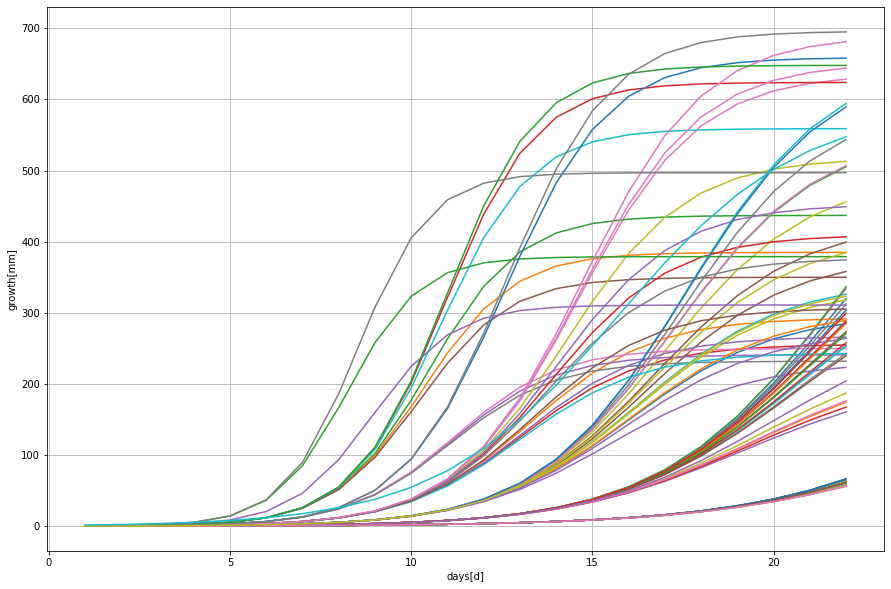

In [6]:
pd.DataFrame(res, columns=t, index=db.plant_name).T.plot(legend=None, grid=True, ylabel='growth[mm]', xlabel='days[d]', figsize=(15,10))
plt.savefig('sample.png')